In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
#%matplotlib inline ensures that the plots you generate with matplotlib are displayed right below the code cell where they are created.


In [2]:
dataset = pd.read_csv('Iris.csv')

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
X = dataset.iloc[:, :-1]  # Exclude the last column 
y = dataset.iloc[:, -1]   # If the last column is the target variable (e.g., species name)


In [8]:
#print(X.head())
print(y.head())

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [9]:
X.shape

(150, 5)

In [10]:
print(y.shape)

(150,)


#### (150,) means it is one dimensional array consisting of elements [1 to 150]

In [11]:
dataset["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

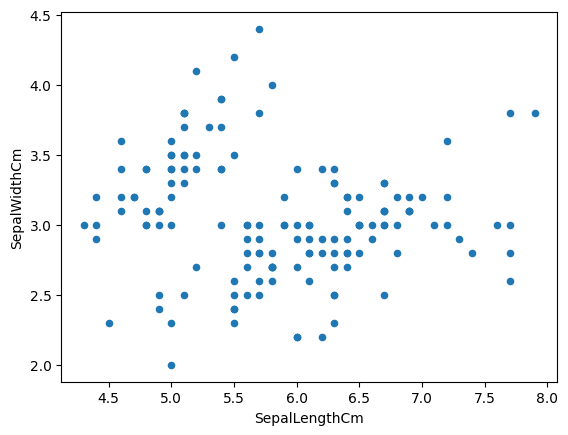

In [12]:
# The first way to plot things is using the .plot extension from Pandas dataframes
dataset.plot(kind="scatter", x =  "SepalLengthCm", y = "SepalWidthCm")

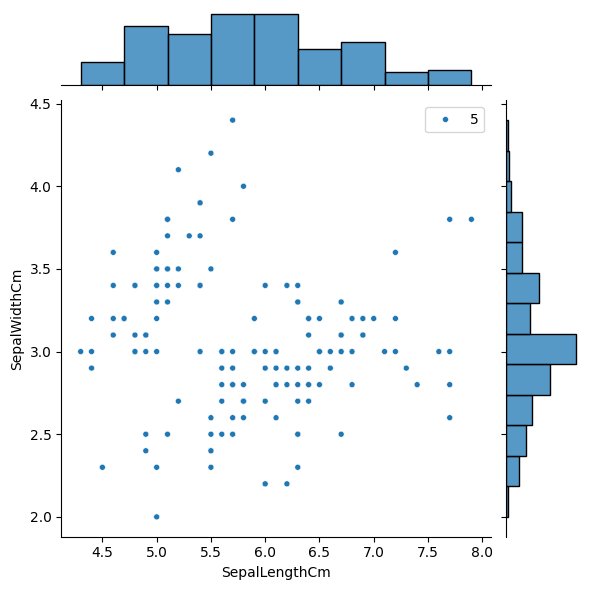

In [13]:
# use seaborn to plot a similar one 
# A seaborn jointplot shows bivariate scatterplots and univariate histogram in the same figure
sns.jointplot (x = "SepalLengthCm", y = "SepalWidthCm", data=dataset, size =5)

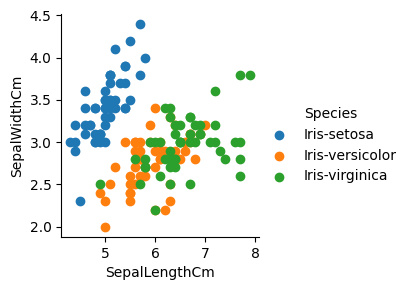

In [14]:
# Now use seaborn's FacetGrid to color the scatterplot by species 
# FacetGrid in Seaborn helps you create multiple plots from a dataset, each showing a different slice (facet) of the data. It breaks your data into small groups (based on categories) and makes separate plots for each group, all arranged neatly in a grid.
sns.FacetGrid(dataset, hue= "Species").map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

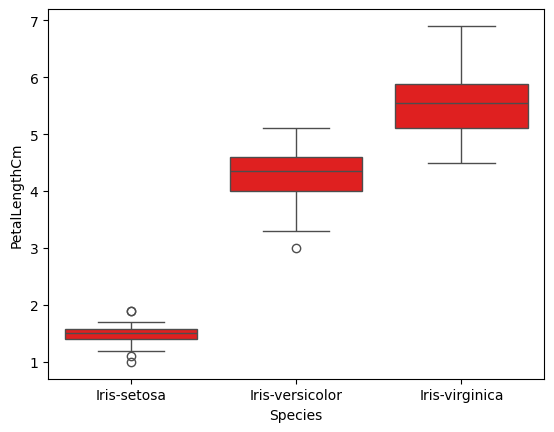

In [15]:
# Use boxplot to visualize individual feature
sns.boxplot(x = "Species", y = "PetalLengthCm", data=dataset, color = 'Red' )

C:\Users\syeda\AppData\Local\Temp\ipykernel_13220\542878756.py:5: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x="Species", y="PetalLengthCm", data = dataset, jitter = True, edgecolor="gray")


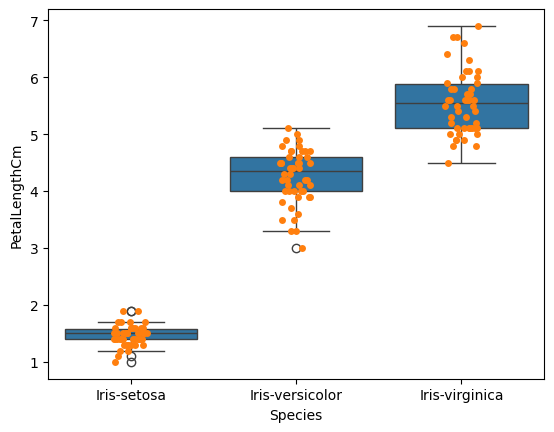

In [16]:
# We can extend this plot by adding a layer of individual points on top of it through Seaborn's triplot
# Use jitter=True so that all the points don't fall in single vertical lines above the species 
# saving the resulting axes as ax each time causes the resulting plots to be shown on top of the previous axes
ax = sns.boxplot(x="Species", y = "PetalLengthCm", data = dataset)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data = dataset, jitter = True, edgecolor="gray")

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

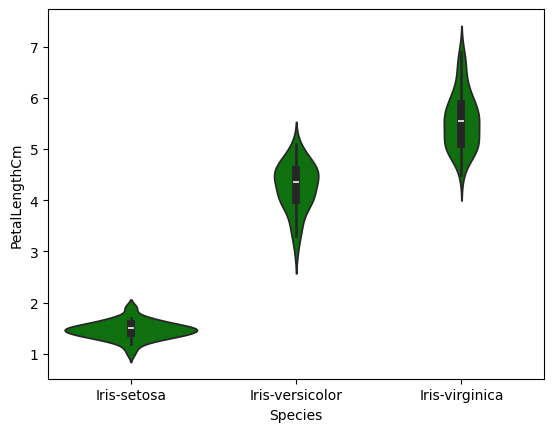

In [17]:
# A violin plot combines the benefits of the previous two plots and simplifies them.
# Denser region of the data are fatter, and sparser thinner in a violin plot
sns.violinplot(x="Species", y = "PetalLengthCm", data = dataset, color = 'green')

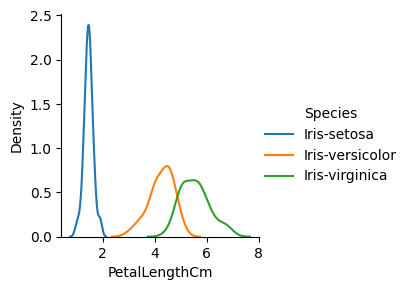

In [18]:
# Another useful seaborn plot for looking at univariate relations is the kdeplot, 
# which creates and visualizes a kernel density estimate of underlying features
sns.FacetGrid(dataset, hue="Species")\
    .map(sns.kdeplot, "PetalLengthCm")\
    .add_legend()

 ## Apply Random Forests

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=10, random_state=42))

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy = pipeline.score(X_test, y_test)
print(f"Test accuracy after fixing data leakage: {test_accuracy}")
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

Training set shape: (105, 5), Testing set shape: (45, 5)
Test accuracy after fixing data leakage: 1.0


RandomForestClassifier()

In [21]:
clf.predict(X_test)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [22]:
y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
146     Iris-virginica
51     Iris-versicolor
27         Iris-setosa
4          Iris-setosa
32         Iris-setosa
142     Iris-virginica
85     Iris-versicolor
86     Iris-versicolor
16         

In [23]:
## Cross validation score
clf.score(X_test, y_test)

1.0

In [24]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.86666667 1.         1.         1.         0.86666667]
Mean cross-validation score: 0.9466666666666667


In [25]:
print(type(dataset))


<class 'pandas.core.frame.DataFrame'>


## Printing cross validation report 

In [27]:


from sklearn.metrics import classification_report
# Check the columns to ensure 'Species' is the target variable
print(dataset.columns)

# Separate features and target variable
X = dataset.drop(columns='Species')  # Drop the target column to create feature set
y = dataset['Species']  # Target variable
y_pred = pipeline.predict(X_test)
# Generate the classification report
# Use unique target names from the dataset if they are string labels
target_names = dataset['Species'].unique()
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

